## Data set corrigé

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg

import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability', 'Unnamed: 0'], axis=1)
df_
df_labels = pd.read_csv('../../data/data_preprocessed.csv')
df
df_

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability_det
0,7.080795,219.674262,22210.613083,5.875041,333.775777,398.517703,11.502316,112.412210,2.994259,0
1,6.783888,193.653581,13677.106441,5.171454,323.728663,477.854687,15.056064,66.396293,3.250022,1
2,6.010618,184.558582,15940.573271,8.165222,421.486089,314.529813,20.314617,83.707938,4.867287,0
3,8.097454,218.992436,18112.284447,6.196947,333.775777,376.569803,17.746264,59.909941,4.279082,1
4,8.072612,210.269780,16843.363927,8.793459,359.516169,559.167574,17.263576,68.738989,5.082206,0
...,...,...,...,...,...,...,...,...,...,...
2288,8.124208,207.509515,26489.114701,8.540837,318.059624,431.625677,10.075598,63.984225,4.724457,0
2289,10.391942,262.741770,39116.682706,3.205786,285.728420,473.313969,13.300688,65.318816,5.771715,0
2290,7.790875,196.478712,24061.349596,6.785685,350.117254,471.518536,15.343316,44.544627,3.076214,1
2291,6.139743,168.444214,23894.136010,9.494582,318.026087,494.129125,19.116022,60.264767,3.841222,0


In [3]:
X = df_.drop('Potability_det', axis=1)
y = df_['Potability_det']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser le RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9941860465116279
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       441
           1       1.00      0.98      0.99       247

    accuracy                           0.99       688
   macro avg       1.00      0.99      0.99       688
weighted avg       0.99      0.99      0.99       688

Confusion Matrix:
[[441   0]
 [  4 243]]


Accuracy: 0.9941860465116279
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       441
           1       1.00      0.98      0.99       247

    accuracy                           0.99       688
   macro avg       1.00      0.99      0.99       688
weighted avg       0.99      0.99      0.99       688



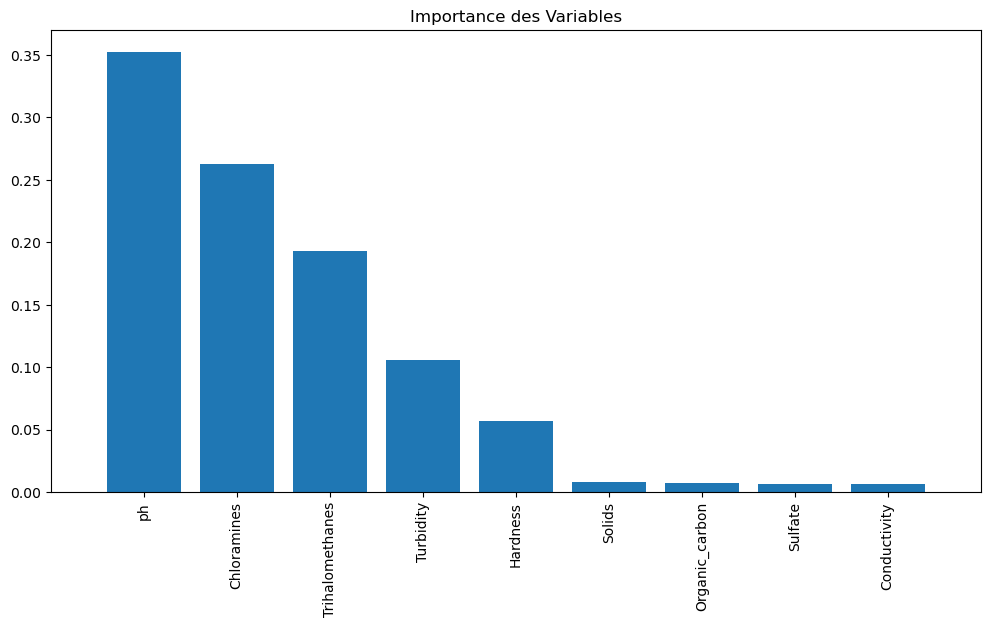

C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: 'red' is not a valid color value.

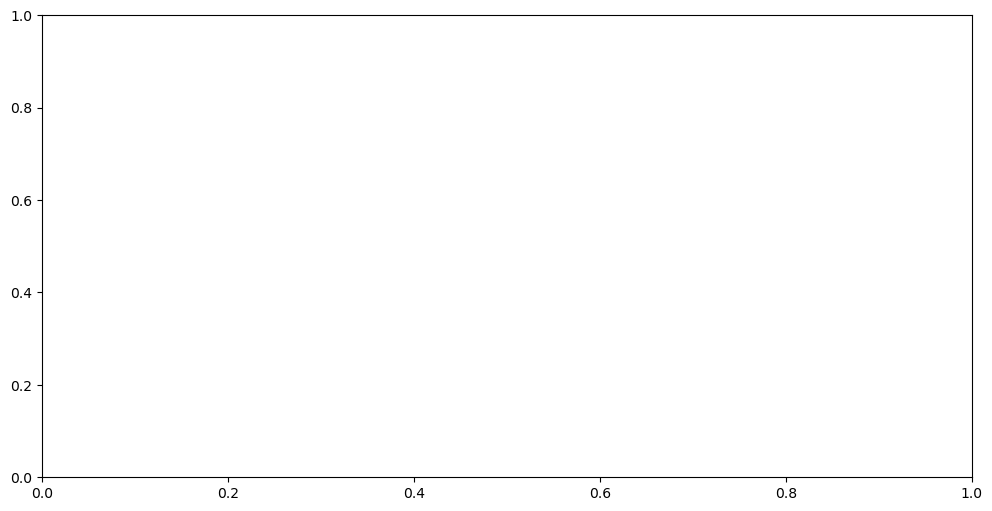

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser le RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Importance des variables
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Importance des Variables")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Sélectionner deux caractéristiques spécifiques pour l'affichage des frontières de décision
X_subset = X.iloc[:, [0, 1]]  # Ici, on sélectionne les deux premières colonnes, ajustez en fonction de vos besoins
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_subset, y, test_size=0.3, random_state=42)

# Réentraîner le modèle sur les deux premières caractéristiques
clf = DecisionTreeClassifier().fit(X_train_2d, y_train_2d)

x_min, x_max = X_subset.iloc[:, 0].min() - 1, X_subset.iloc[:, 0].max() + 1
y_min, y_max = X_subset.iloc[:, 1].min() - 1, X_subset.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_subset.iloc[:, 0], X_subset.iloc[:, 1], c=y, edgecolors='k', marker='o', alpha=0.8)
plt.title("Frontières de décision de l'Arbre de Décision")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.show()

# Influence de λ sur la précision de validation
lambda_values = np.logspace(-4, 0, 10)
validation_accuracies = []

for lambda_value in lambda_values:
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_features=lambda_value)
    rf_model.fit(X_train, y_train)
    y_pred_val = rf_model.predict(X_test)
    validation_accuracies.append(accuracy_score(y_test, y_pred_val))

plt.figure(figsize=(12, 6))
plt.plot(lambda_values, validation_accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Valeurs de λ (log scale)')
plt.ylabel('Précision de validation')
plt.title('Influence de λ sur la précision de validation')
plt.show()

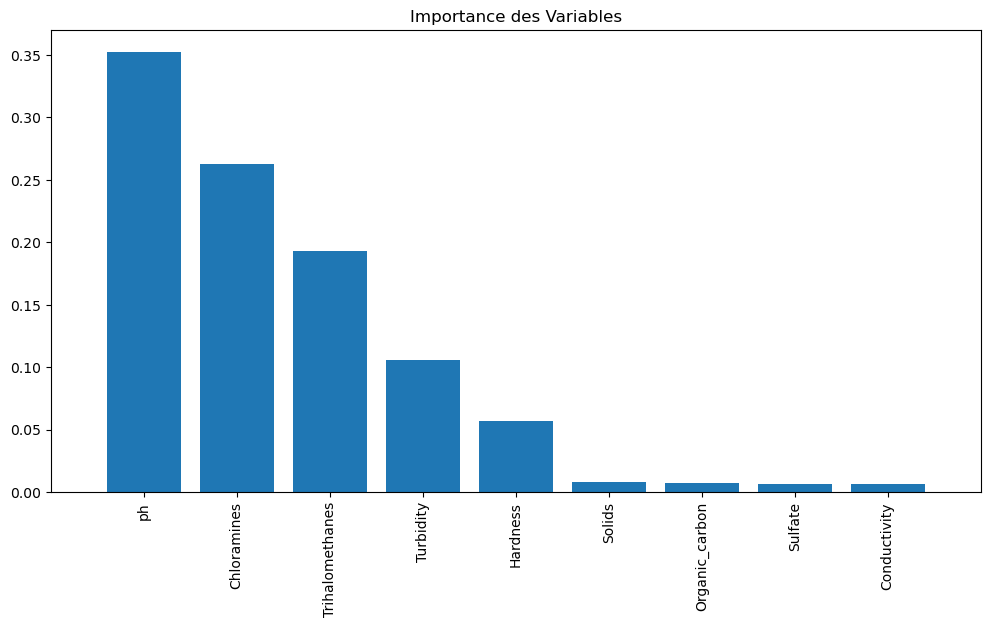

In [6]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Importance des Variables")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

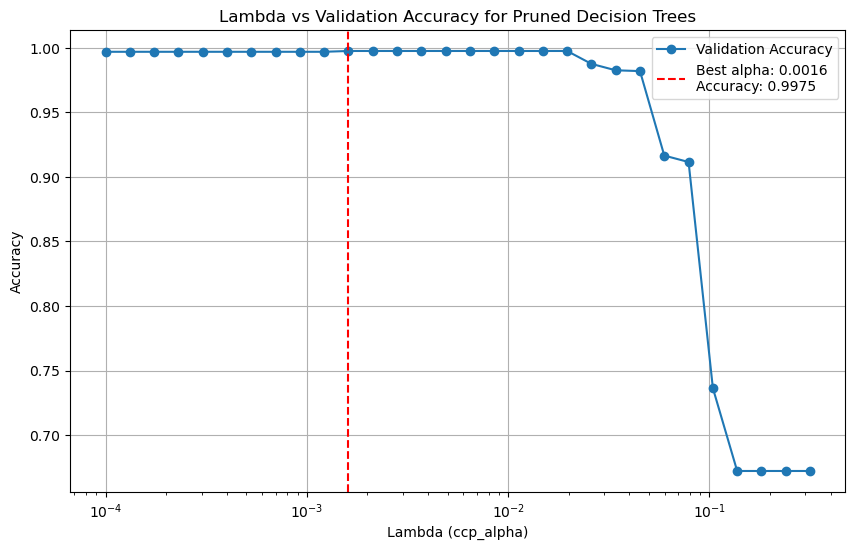

In [7]:
# Split the data into training and testing sets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the range of alpha (complexity parameter)
alphas = np.logspace(-4, -0.5, 30)
train_scores = []
val_scores = []

# Perform cross-validation for each alpha
for alpha in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    val_score = cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy').mean()
    tree.fit(X_train, y_train)
    train_score = tree.score(X_train, y_train)
    
    train_scores.append(train_score)
    val_scores.append(val_score)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, val_scores, label='Validation Accuracy', marker='o')
plt.axvline(x=alphas[np.argmax(val_scores)], linestyle='--', color='red', 
            label=f'Best alpha: {alphas[np.argmax(val_scores)]:.4f}\nAccuracy: {max(val_scores):.4f}')
plt.xlabel('Lambda (ccp_alpha)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Lambda vs Validation Accuracy for Pruned Decision Trees')
plt.legend()
plt.grid(True)
plt.show()

## Dataset non corrigé

Accuracy: 0.6453488372093024
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.88      0.75       408
           1       0.63      0.30      0.41       280

    accuracy                           0.65       688
   macro avg       0.64      0.59      0.58       688
weighted avg       0.64      0.65      0.61       688



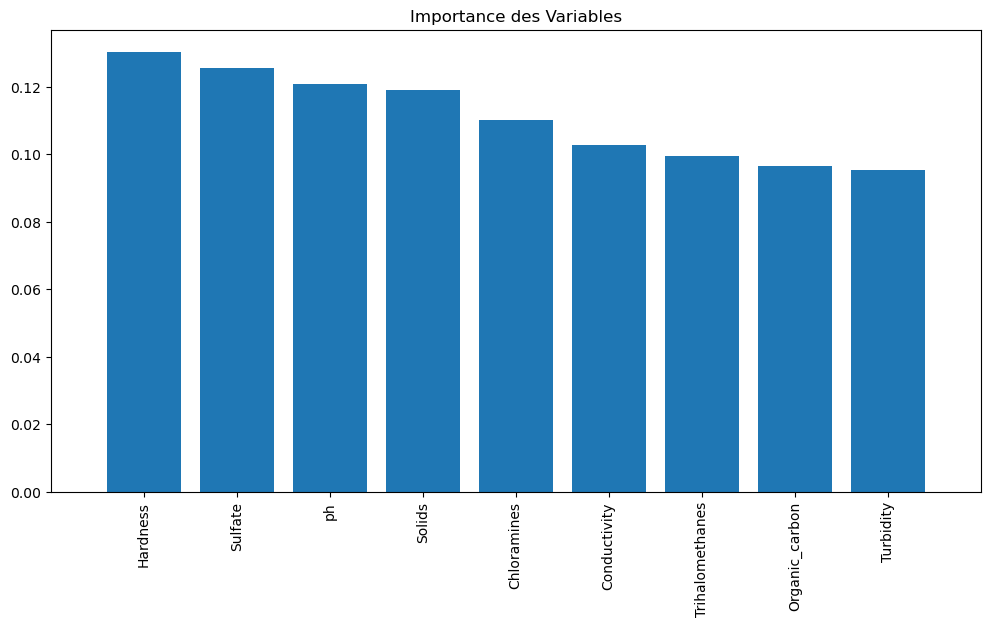

C:\Users\Grzadziel Bartlomiej\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: 'red' is not a valid color value.

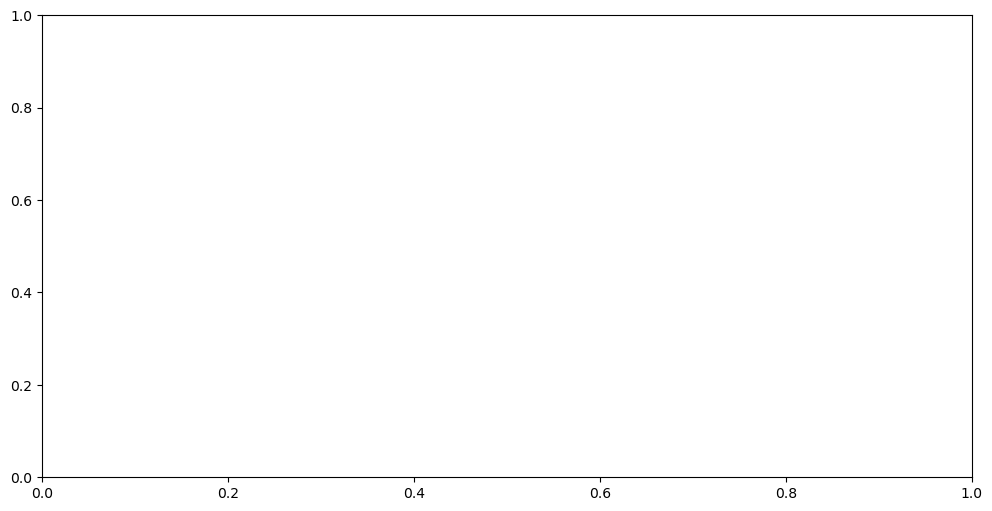

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
df = pd.read_csv('../../data/data_preprocessed.csv')
df_ = df.drop(['Potability_det', 'Unnamed: 0'], axis=1)
X = df_.drop('Potability', axis=1)
y = df_['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialiser le RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Importance des variables
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Importance des Variables")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Sélectionner deux caractéristiques spécifiques pour l'affichage des frontières de décision
X_subset = X.iloc[:, [0, 1]]  # Ici, on sélectionne les deux premières colonnes, ajustez en fonction de vos besoins
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_subset, y, test_size=0.3, random_state=42)

# Réentraîner le modèle sur les deux premières caractéristiques
clf = DecisionTreeClassifier().fit(X_train_2d, y_train_2d)

x_min, x_max = X_subset.iloc[:, 0].min() - 1, X_subset.iloc[:, 0].max() + 1
y_min, y_max = X_subset.iloc[:, 1].min() - 1, X_subset.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green')))
plt.scatter(X_subset.iloc[:, 0], X_subset.iloc[:, 1], c=y, edgecolors='k', marker='o', alpha=0.8)
plt.title("Frontières de décision de l'Arbre de Décision")
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
plt.show()

# Influence de λ sur la précision de validation
lambda_values = np.logspace(-4, 0, 10)
validation_accuracies = []

for lambda_value in lambda_values:
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_features=lambda_value)
    rf_model.fit(X_train, y_train)
    y_pred_val = rf_model.predict(X_test)
    validation_accuracies.append(accuracy_score(y_test, y_pred_val))

plt.figure(figsize=(12, 6))
plt.plot(lambda_values, validation_accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Valeurs de λ (log scale)')
plt.ylabel('Précision de validation')
plt.title('Influence de λ sur la précision de validation')
plt.show()

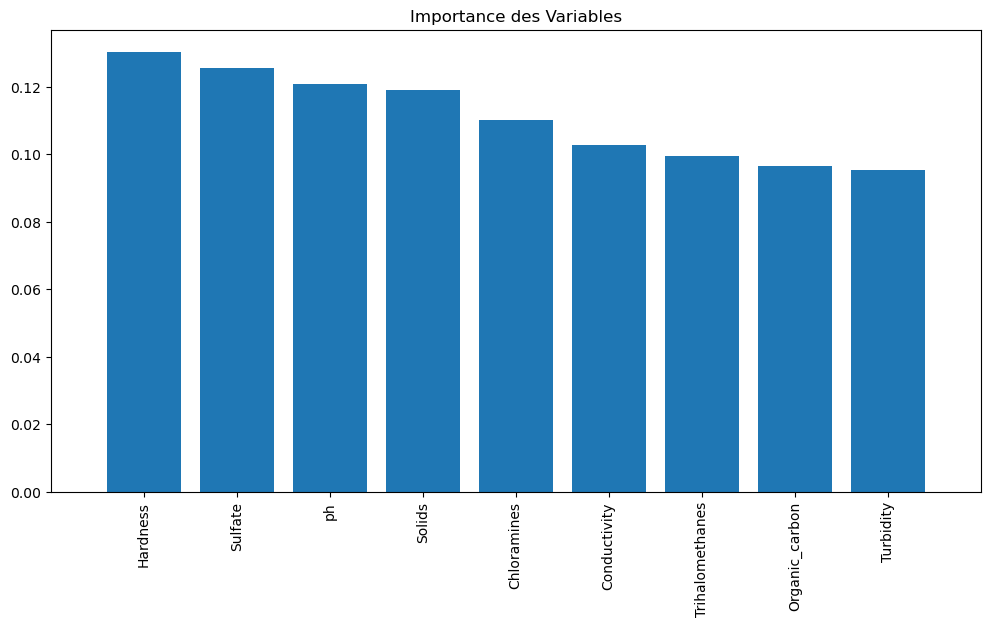

In [9]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Importance des Variables")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()